In [1]:
# using the dual moving average crossover when to buy and sell crypto

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from fastquant import get_crypto_data
from fastquant import backtest
# https://github.com/enzoampil/fastquant

In [3]:
btc = get_crypto_data("BTC/USDT", "2014-05-01", "2020-08-20")
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2017-08-17 to 2018-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    500 non-null    float64
 1   high    500 non-null    float64
 2   low     500 non-null    float64
 3   close   500 non-null    float64
 4   volume  500 non-null    float64
dtypes: float64(5)
memory usage: 23.4 KB


In [4]:
btc.describe()

,open,high,low,close,volume
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7577.517160,7848.480860,7235.010820,7576.423500,27678.999919
std,3042.091322,3224.699733,2748.115373,3042.629054,21213.898937
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,6134.300000,6269.405000,5872.507500,6136.160000,9337.499233
50%,6753.730000,6895.255000,6610.500000,6755.480000,27136.217613
75%,8687.957500,8991.737500,8284.500000,8687.942500,40332.102276
max,19120.190000,19798.680000,18510.000000,19102.660000,117380.951590


In [5]:
#eth = get_crypto_data("ETH/USDT", "2019-05-01", "2020-08-20")
#eth.head()

Starting Portfolio Value: 100000.00
2018-12-29, ===Global level arguments===
2018-12-29, init_cash : 100000
2018-12-29, buy_prop : 1
2018-12-29, sell_prop : 1
2018-12-29, commission : 0.0075
2018-12-29, stop_loss : 0
2018-12-29, stop_trail : 0
===Strategy level arguments===
fast_period : 21
slow_period : 40
2018-12-29, Final Portfolio Value: 185654.39127500003
2018-12-29, Final PnL: 85654.39
Time used (seconds): 0.42628002166748047
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:21	slow_period:40
Returns	rtot:0.6187166478699361	ravg:0.001237433295739872	rnorm:0.3659268244901886	rnorm100:36.59268244901886
Sharpe	sharperatio:0.6760139295317686
Dra

<IPython.core.display.Javascript object>


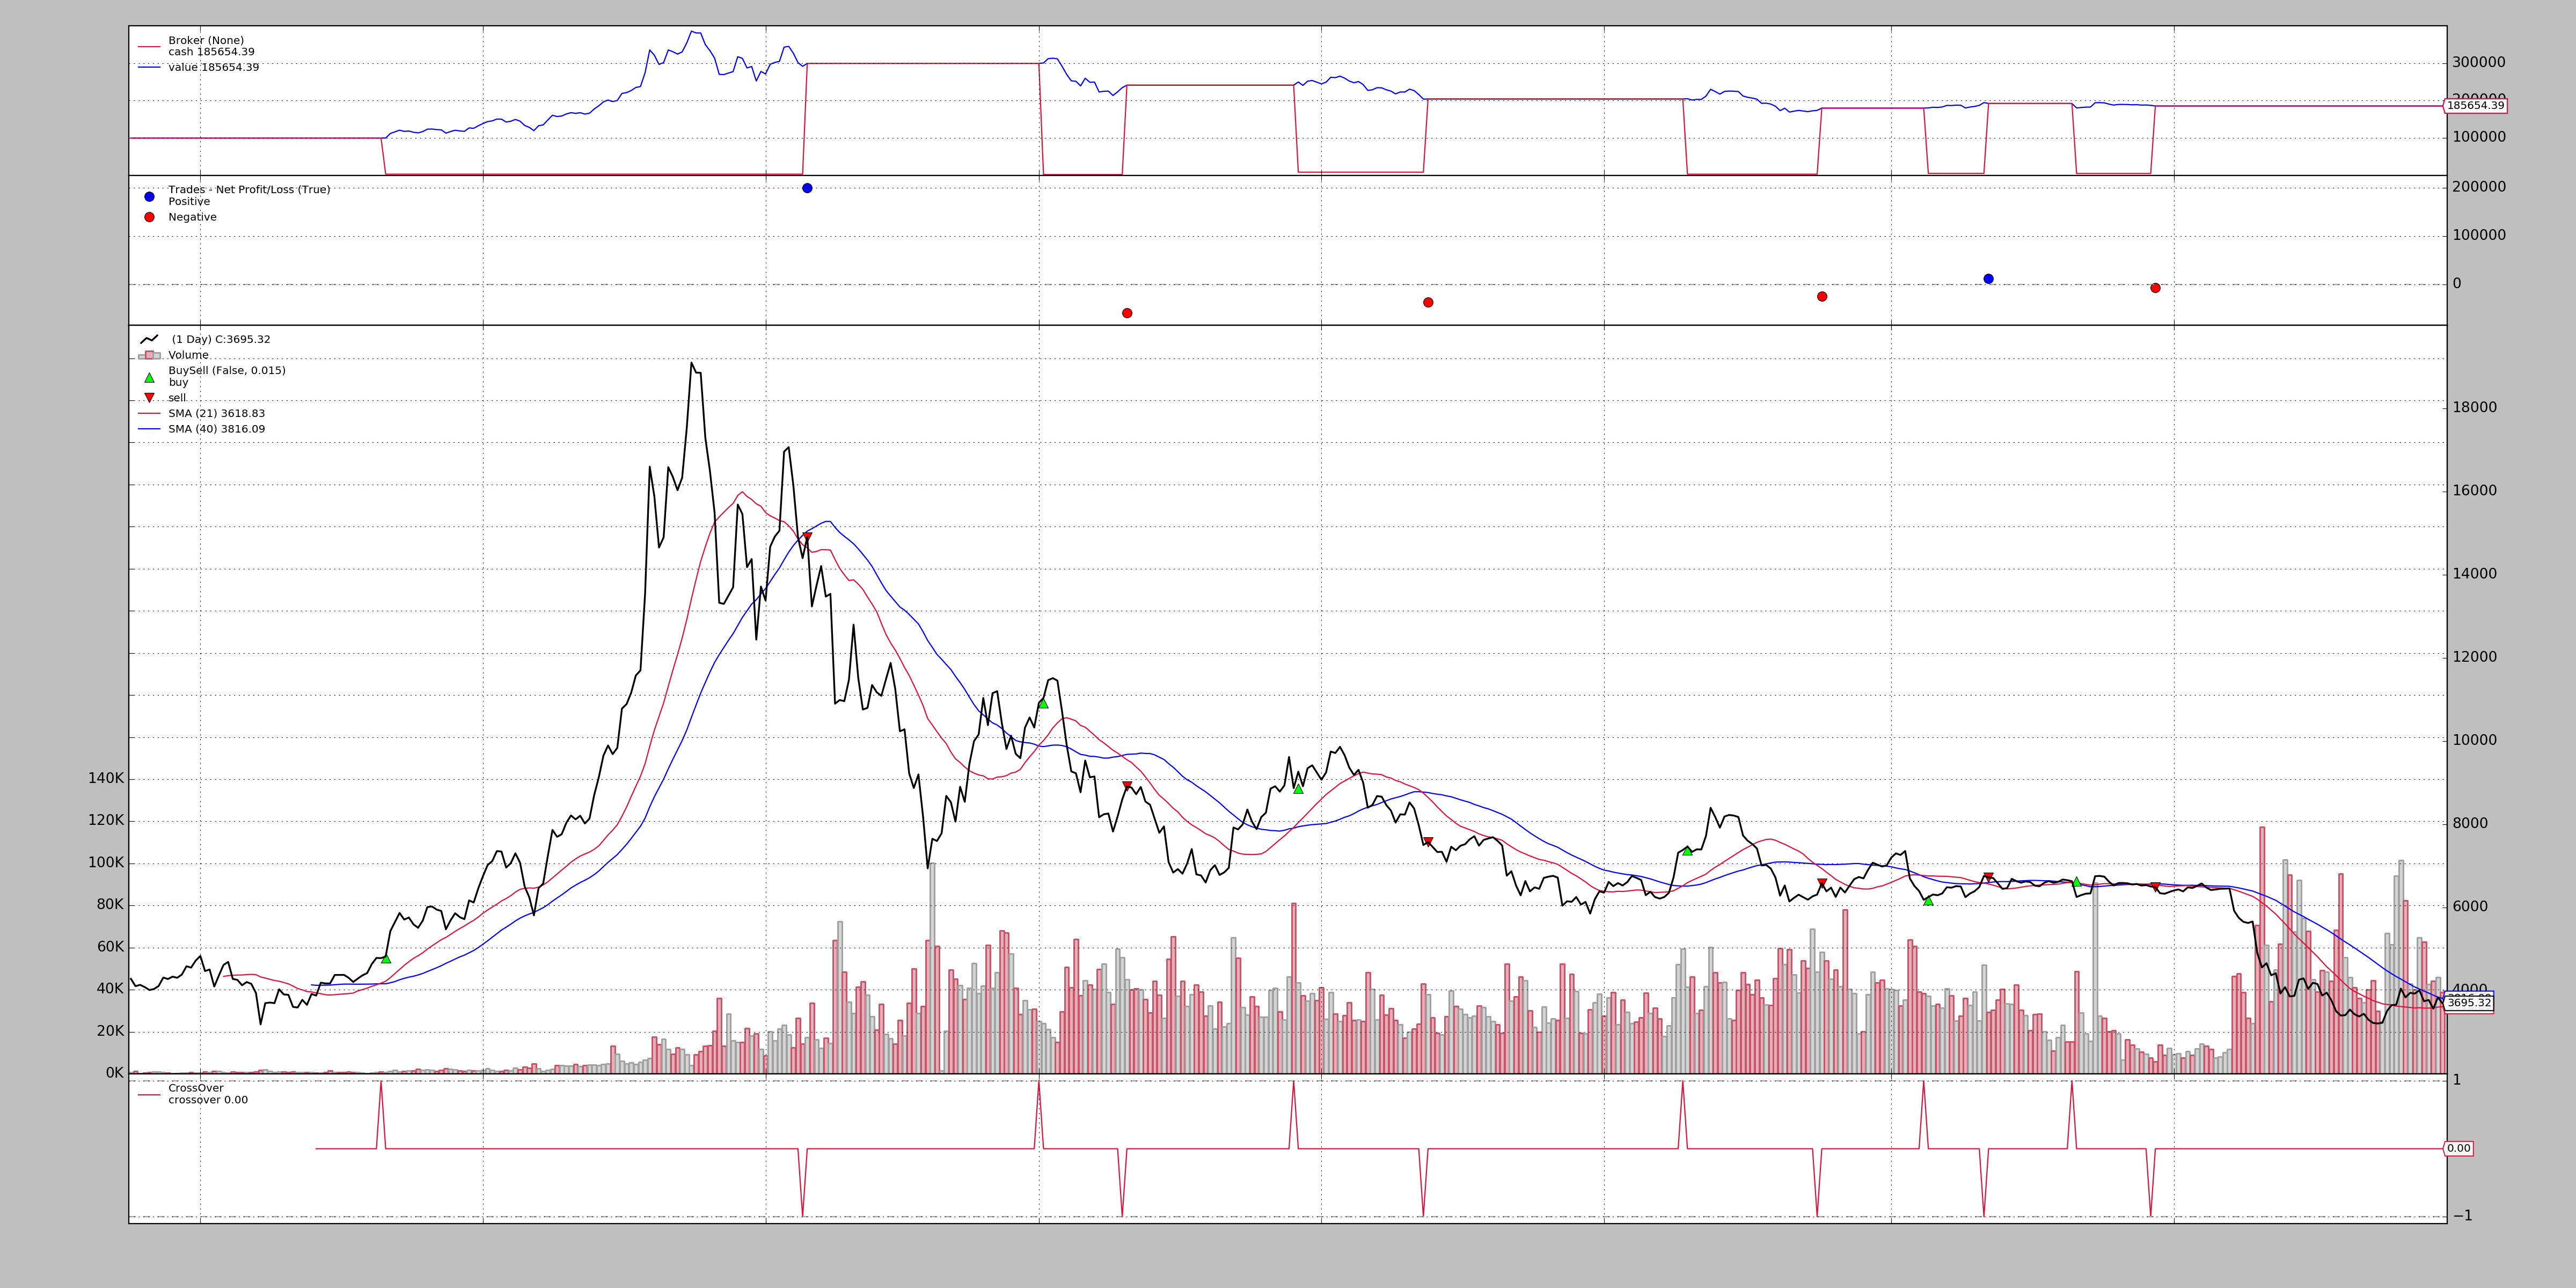

In [6]:
# simple moving average
# oldest and most widely used techincal indicator.
# adds together the last 15 days, divides to find mean. Same with the 40 days
# every day a data point gets tossed and one gets added
# more days = more data points and the slower changes will make an impact
# when the faster moving average > slower moving average, bullish
# when the faster moving average < slower moving average, bearish
btc_SMAC = backtest('smac', 
                    btc, 
                    fast_period=21, # can use range(10,20,30) to test multiple
                    slow_period=40)
# use ratio between the two averages as an input variable, a long with as much information as
# possible on the buys=good/sells = good

In [8]:
#for optimizing the input parameters for SMAC
#print(btc_SMAC[['fast_period', 'slow_period', "final_value"]].head())

In [9]:
# relative strength index
# made to measure coin momentum
# average gains/average losses over chosen time period
# plotted 0 to 100
# above 1 -> making money
# oversold is rsi score < 30
# crossing over 30 going up is seen as a bullish signal
# overbought is rsi score > 70
# crossing over 70 going down is seen as a bearish signal
# 50 is dead center so use some ratio of rsi score, nevermind just standardize it
btc_RSI = backtest('rsi', btc, rsi_period=14, rsi_lower=30, rsi_upper=70)

Starting Portfolio Value: 100000.00
2018-12-29, ===Global level arguments===
2018-12-29, init_cash : 100000
2018-12-29, buy_prop : 1
2018-12-29, sell_prop : 1
2018-12-29, commission : 0.0075
2018-12-29, stop_loss : 0
2018-12-29, stop_trail : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2018-12-29, Final Portfolio Value: 129959.46617499998
2018-12-29, Final PnL: 29959.47
Time used (seconds): 0.3261733055114746
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['rsi']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	rsi_period:14	rsi_upper:70	rsi_lower:30
Returns	rtot:0.2620524171943379	ravg:0.0005241048343886758	rnorm:0.14119324172946388	rnorm100:14.119324172946387
Sharpe	sharperatio

In [10]:
btc_RSI.head()

,strat_id,init_cash,buy_prop,sell_prop,commission,stop_loss,stop_trail,execution_type,channel,symbol,...,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,0,0,close,,,...,14.119324,300,54.043132,152826.268125,"{'len': 300, 'drawdown': 60.02858261050548, 'm...",60.028583,300,0.469898,29959.47,129959.466175


In [11]:
# now we're gonna get fancy and do some sentiment analysis
from fastquant import get_yahoo_data, get_bt_news_sentiment
from datetime import datetime, timedelta

current_date = datetime.now().strftime("%Y-%m-%d")
delta_date = (datetime.now() - timedelta(30)).strftime("%Y-%m-%d")

#data = get_yahoo_data("TSLA", delta_date, current_date)
#sentiments = get_bt_news_sentiment(keyword="tesla", page_nums=3)
#btc_SNTM = backest("sentiment", data, sentiments=sentiments, senti=0.2)

In [12]:
# using facebook's Prophet module to attempt to forecast prices
# this is giving me serious issues with the install, will just kill the kernel if i call Prophet()
# none of this block is working rn

#from fbprophet import Prophet
#import pystan
#ts = btc.reset_index()[["dt", "close"]]
#ts.head()
#ts.columns=['ds', 'y']
# m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
#forecast = m.make_future_dataframe(periods=0, freq='D')

# predict and plot
#pred = m.predict(forecast)
#fig1 = m.plot(pred)
#plt.title('BTC/USDT: Forecasted Daily Closing Price', fontsize=25)


In [14]:
# using multiple strategies... nested JSON!
strats = {
    "smac": {"fast_period": 35, "slow_period": 50},
    "rsi" : {"rsi_lower": 30, "rsi_upper": 70}
}

btc_multi = backtest("multi", btc, strats=strats)
btc_multi.shape

# Utilize auto grid search
strats_opt = { 
    "smac": {"fast_period": 35, "slow_period": [40, 50]}, 
    "rsi": {"rsi_lower": [15, 30], "rsi_upper": 70} 
} 

res_opt = backtest("multi", df, strats=strats_opt)
res_opt.shape
# (4, 16)

Starting Portfolio Value: 100000.00
2018-12-29, ===Global level arguments===
2018-12-29, init_cash : 100000
2018-12-29, buy_prop : 1
2018-12-29, sell_prop : 1
2018-12-29, commission : 0.0075
2018-12-29, stop_loss : 0
2018-12-29, stop_trail : 0
===Strategy level arguments===
fast_period : 35
slow_period : 50
2018-12-29, ===Global level arguments===
2018-12-29, init_cash : 100000
2018-12-29, buy_prop : 1
2018-12-29, sell_prop : 1
2018-12-29, commission : 0.0075
2018-12-29, stop_loss : 0
2018-12-29, stop_trail : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2017-09-14, BUY CREATE, 3189.02
2017-09-14, Cash: 100000.0
2017-09-14, Price: 3189.02
2017-09-14, Buy prop size: 31
2017-09-14, Afforded size: 31
2017-09-14, Final size: 31
2017-09-15, BUY EXECUTED, Price: 3189.02, Cost: 98859.62, Comm: 741.45, Size: 31.00
2017-10-12, SELL CREATE, 5649.98
2017-10-13, SELL EXECUTED, Price: 5649.98, Cost: 98859.62, Comm: 1313.62, Size: -31.00
2017-10-13, OPERATION PROFIT,

NameError: name 'df' is not defined

In [ ]:
# maybe do a LSTM prediction? Buy when more than a certain pecentage increase in the next week?